<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_16_Probabilidad_de_una_distribuci%C3%B3n_de_variables_aleatorias_continuas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilidad de distribuciones continuas

La densidad de densidad (*pdf probability density function*) es una rerpesentación visual de la función matemática que denota la densidad de una distribución de datos de variables continuas.

Una función acumulada de probabilidad (*CDF Cumultive Distribution Function*) es una función que proporciona la probabilidad acumulada de que una variable aleatoria sea menor o igual a un intervalo específico. Se denota como:

Toda la probabilidad acumulada o área bajo la curva es 1 en términos relativos o 100% en términos porcentuales.

$$
F(x)=∫_{-∞}^{+∞}f(x)dx
$$

Para calcular la probabilidad de in intervalo en donde $a$ es el valor mímino y $b$ el valor máximo de un intervalo en donde x debe ser parte del intervalo y la funcion de densidad definida por $f(x)= ...$

El intervalo se define como:
$$
a \le x \le b;
$$

$$
\text {x forma parte de la función de densidad }f(x)
$$

Para calcular el área bajo la curva del intervalo:
$$
F(x)=∫_a^bf(x)dx
$$


donde  $f(x)$  es la densidad (PDF).

En otras palabras para calcular la probabilidd de una variable aleatoria continua que está inmersa en una función de densidad $f(x)$ se necesita calcular el área bajo la curva definida por un intervalo por debajo de la curva.

# Objetivo

Calcular probabilidades de distribuciones continuas por medio de de funcionse integrate() integral de un intervalo.



# Desarrollo

## Cargar librerías

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math

import sympy as sp

from scipy.stats import norm
import scipy.integrate as spi



## Cargar funciones



In [29]:
# Densidad normal
def f_x_normal(x, media, desviacion_estandar):
  # Calcular la PDF de la variable aleatoria continua
  fx = 1 / (desviacion_estandar * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desviacion_estandar**2))
  return fx

# Función para visualizar la densidad de probabilidad de una distribución normal
def f_visualizar_dens_normal(valores, media, desviacion_estandar):
    # Crear un rango de valores para la PDF
    x = np.linspace(media - 3 * desviacion_estandar, media + 3 * desviacion_estandar, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desviacion_estandar * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desviacion_estandar**2))

    # Visualizar la PDF
    plt.plot(x, pdf, label='PDF: Normal({},{})'.format(media, desviacion_estandar))
    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    # plt.grid(True)
    plt.show()

def f_visualizar_dens_area_normal(valores, media, desviacion_estandar, a, b, prob=0):
    # Crear un rango de valores para la PDF
    x = np.linspace(media - 3 * desviacion_estandar, media + 3 * desviacion_estandar, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desviacion_estandar * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desviacion_estandar**2))

    # Visualizar la PDF
    plt.plot(x, pdf, label='PDF: Normal({},{})'.format(media, desviacion_estandar))
    if prob == 0:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color='red', label='Área bajo la curva')
    else:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color='red', label='Área '+str(np.round(prob * 100, 2))+"%")

    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    # plt.grid(True)
    plt.show()

## Densidad de calificaciones de alumnos

Se genera una muestra $n=100$ de variables aletorias que representan promedios de calificaciones de alumnos alrededor de una media de $80$, $\mu=80$ y una desviación estándar de $5$, $S=5$.





 Las calificaciones de alumnos. x = calificaciones de alumnos
[73.55367108 79.99115845 86.29153151 73.6496141  78.4389176  69.13248537
 81.09090687 69.50785143 77.49506594 78.79924711 79.27899726 83.29718518
 73.09538444 84.89884862 77.17123289 84.58148275 85.9486831  72.05176639
 66.63339861 83.13098365 85.68042262 75.96400262 78.46274395 83.6429523
 88.64669984 79.48589103 80.2404443  74.26466442 83.64061337 79.12488813
 87.21472976 87.17092389 84.03493264 67.19565272 73.79029959 90.6441572
 85.28535392 79.87169195 77.39775982 71.67694966 86.90039928 81.34543396
 72.00902455 68.51340465 75.56203994 81.17530868 85.66718902 76.7574367
 81.14806687 79.6849536  79.96276403 70.60903531 79.96191261 92.74915961
 80.56966182 78.0436292  78.94581517 78.30625794 81.9647306  85.52188093
 78.76313812 75.71417576 85.45464378 84.28770961 78.44841436 80.77625212
 81.96548746 78.44498774 82.37567416 86.21768974 76.78939898 81.67949699
 81.56395707 75.82355002 84.37922389 84.87995647 74.43874493 75.

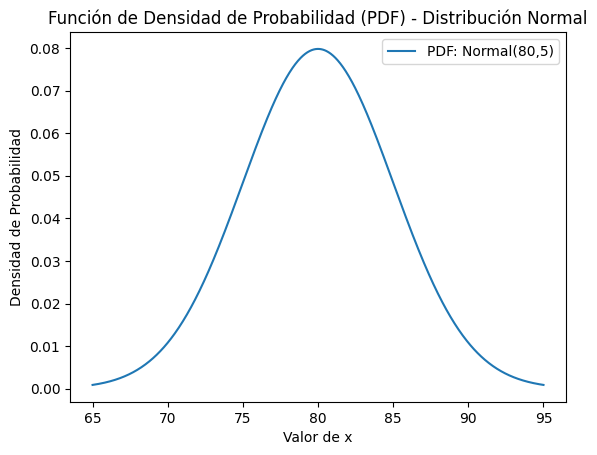

In [30]:
# Parámetros de la distribución normal
n = 100
media = 80
desviacion_estandar = 5
# Generando calificaciones de alumnos
print ("\n Las calificaciones de alumnos. x = calificaciones de alumnos")

# Generar valores aleatorios de una distribución normal
x = norm.rvs(loc = media, scale = desviacion_estandar, size = n)

# Imprimir los valores aleatorios generados
print(x)

# Mandar llamar la función que visualiza únicamente la densidad de una normal
f_visualizar_dens_normal(x, media, desviacion_estandar)

## ¿Cuál es la probabilidad de encontrar a un alumno que tenga promedio entre 75 y 85?. $F(75 \le x \le 85)$


### Visualizando área bajo la curva de la probabilidad

$$
F(75 \le x \le 85)
$$

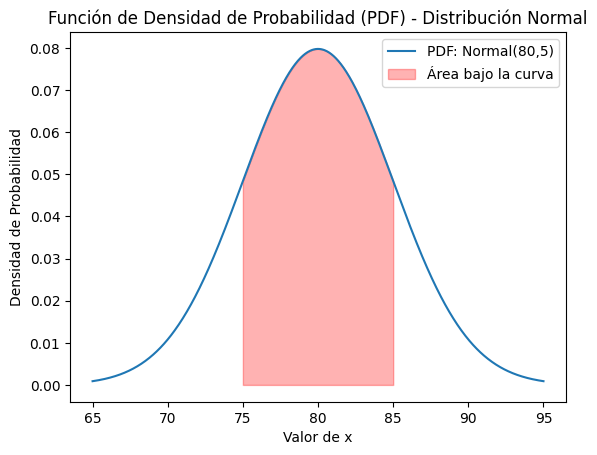

In [45]:
# Límites del intervalo
limite_inferior = 75  # a mínimo
limite_superior = 85  # b máximo

a = limite_inferior
b = limite_superior

f_visualizar_dens_area_normal(x, media, desviacion_estandar, a, b)

### Usando integrales definidas

Mandando llamar la función sp.integrate() que resuelve integrales definidas


$$
f(x) =\frac{1}{\sigma \cdot \sqrt{2 \cdot \pi}}\cdot e
^{\frac{-1}{2}\cdot ( \frac {x - \mu}{\sigma}) ^2}
$$

$$
F(x)=∫_a^bf(x)dx \therefore
$$

$$
F(x)=∫_{75}^{85} \frac{1}{\sigma \cdot \sqrt{2 \cdot \pi}}\cdot e
^{\frac{-1}{2}\cdot ( \frac {x - \mu}{\sigma}) ^2} dx \therefore
$$



In [48]:
# Definir símbolos
x, a, b = sp.symbols('x a b')

# Definir la función de densidad con los valores numéricos
# La función es la misma que la que se definió al inicio: f_x_normal()
y = 1 / (desviacion_estandar * sp.sqrt(2 * sp.pi)) * sp.exp(-(x - media)**2 / (2 * desviacion_estandar**2))

# Realizar la integral definida
resultado = sp.integrate(y, (x, a, b))

# Definir los valores numéricos de los límites del intervalo
limite_inferior = 75
limite_superior = 85

# Sustituir los valores numéricos en el resultado
resultado = resultado.subs({a: limite_inferior, b: limite_superior})

# Imprimir el resultado
print(f"El área bajo la curva en el intervalo es: {float(resultado)}")

El área bajo la curva en el intervalo es: 0.6826894921370859


### Usando la función *spi.quad()* para calcular la probabilidad $
F(75≤x≤85) $

La función *quad()* realiza la integración numérica de la PDF en el intervalo especificado y devuelve el área bajo la curva.

El resultado, area bajo la curva, representa la probabilidad de que una variable aleatoria normal caiga en ese intervalo o rango entre $ \text{a y b}$.


El área bajo la curva en el intervalo [75, 85] es: 0.6827 o 68.2689%


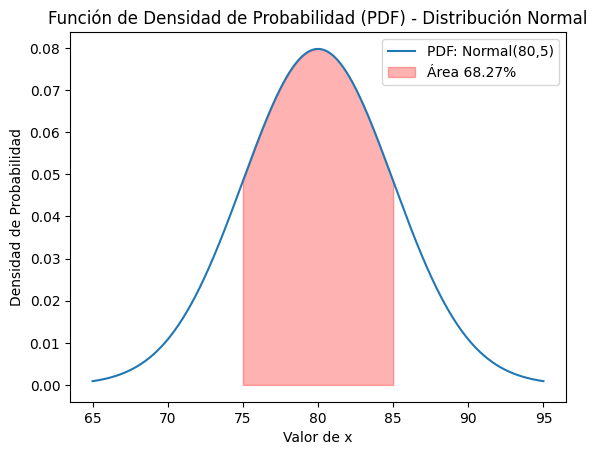

In [49]:
# Límites del intervalo. Volver a generarlos
a = limite_inferior
b = limite_superior

# Función de densidad de probabilidad (PDF) de la distribución normal
pdf = norm.pdf

# Calcular el área bajo la curva en el intervalo [75, 85]
probabilidad, _ = spi.quad(pdf, limite_inferior, limite_superior, args=(media, desviacion_estandar))

# probabilidad, _ = spi.quad(pdf, a, b, args=(media, desviacion_estandar))

print(f"El área bajo la curva en el intervalo [{a}, {b}] es: {np.round(probabilidad, 4)} o {np.round(probabilidad * 100, 4)}%")

f_visualizar_dens_area_normal(x, media, desviacion_estandar, a, b, probabilidad)

# Interpretación

¿Cómo determinar la probabilidad de una distribución continua?

Encontrar el área bajo la curva de la densidad o la probabilidad de que x esté entre 80 y 85 de la última curva presentada.






El área bajo la curva en el intervalo [80, 85] es: 0.3413 o 34.1345%


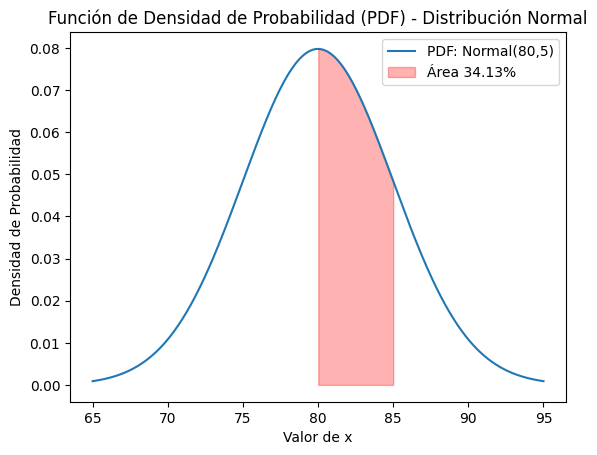

In [50]:
# Límites del intervalo. Volver a generarlos
a = limite_inferior = 80
b = limite_superior = 85

# Función de densidad de probabilidad (PDF) de la distribución normal
pdf = norm.pdf

# Calcular el área bajo la curva en el intervalo [80, 85]
probabilidad, _ = spi.quad(pdf, limite_inferior, limite_superior, args=(media, desviacion_estandar))

print(f"El área bajo la curva en el intervalo [{a}, {b}] es: {np.round(probabilidad, 4)} o {np.round(probabilidad * 100, 4)}%")

f_visualizar_dens_area_normal(x, media, desviacion_estandar, a, b, probabilidad)

Encontrar el área bajo la curva de la densidad o la probabilidad de que x esté entre 60 y 70 de la última curva presentada.

El área bajo la curva en el intervalo [60, 70] es: 0.0227 o 2.2718%


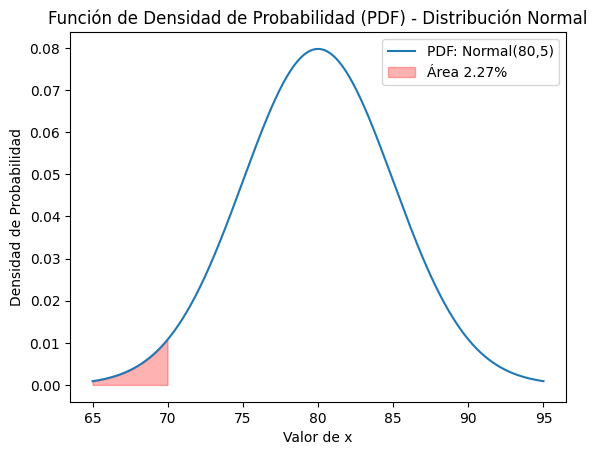

In [51]:
# Límites del intervalo. Volver a generarlos
a = limite_inferior = 60
b = limite_superior = 70

# Función de densidad de probabilidad (PDF) de la distribución normal
pdf = norm.pdf

# Calcular el área bajo la curva en el intervalo [60, 70]
probabilidad, _ = spi.quad(pdf, limite_inferior, limite_superior, args=(media, desviacion_estandar))

print(f"El área bajo la curva en el intervalo [{a}, {b}] es: {np.round(probabilidad, 4)} o {np.round(probabilidad * 100, 4)}%")

f_visualizar_dens_area_normal(x, media, desviacion_estandar, a, b, probabilidad)